In [180]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [181]:
train = pd.read_csv("train.csv")

In [182]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [183]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [184]:
# We see that LoanAmount, Loan_Amount_Term and Credit_History has some missing values

In [185]:
train.drop("Loan_ID", axis = 1, inplace = True) #drop Loan_ID

In [189]:
train.fillna(0, inplace = True)

In [190]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,141.166124,334.201954,0.773616
std,6109.041673,2926.248369,88.340630,82.183884,0.418832
min,150.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,98.000000,360.000000,1.000000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [191]:
train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [192]:
train["Dependents"].unique()

array(['0', '1', '2', '3+', 0], dtype=object)

In [193]:
train["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [194]:
train["Gender"].unique()

array(['Male', 'Female', 0], dtype=object)

In [195]:
train["Married"].unique()

array(['No', 'Yes', 0], dtype=object)

In [196]:
train["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [197]:
train["Self_Employed"].unique()

array(['No', 'Yes', 0], dtype=object)

In [198]:
train["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [118]:
#Transfer object columns into True/False multiple columns

In [199]:
train_encoded = pd.get_dummies(train, columns = ["Dependents", "Property_Area", "Gender", "Married", "Education", "Self_Employed"])

In [201]:
train_encoded.columns = train_encoded.columns.str.replace(" ", "_")

In [225]:
train_encoded.columns.values[6] = "Dependets_00"

In [227]:
X_data = train_encoded.drop("Loan_Status", axis = 1)

In [228]:
y_data = train_encoded["Loan_Status"]

In [229]:
X_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependets_00,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,...,Gender_Female,Gender_Male,Married_0,Married_No,Married_Yes,Education_Graduate,Education_Not_Graduate,Self_Employed_0,Self_Employed_No,Self_Employed_Yes
0,5849,0.0,0.0,360.0,1.0,0,1,0,0,0,...,0,1,0,1,0,1,0,0,1,0
1,4583,1508.0,128.0,360.0,1.0,0,0,1,0,0,...,0,1,0,0,1,1,0,0,1,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,0,0,...,0,1,0,0,1,1,0,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,0,0,...,0,1,0,0,1,0,1,0,1,0
4,6000,0.0,141.0,360.0,1.0,0,1,0,0,0,...,0,1,0,1,0,1,0,0,1,0


In [230]:
y_data.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [232]:
y_data.replace("N", "0", inplace = True)

In [233]:
y_data.replace("Y", "1", inplace = True)

In [234]:
y_data.unique()

array(['1', '0'], dtype=object)

In [235]:
y_data = y_data.astype(int)

In [236]:
y_data.unique()

array([1, 0])

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, stratify = y_data)

In [251]:
X_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependets_00,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,...,Gender_Female,Gender_Male,Married_0,Married_No,Married_Yes,Education_Graduate,Education_Not_Graduate,Self_Employed_0,Self_Employed_No,Self_Employed_Yes
194,4191,0.0,120.0,360.0,1.0,0,1,0,0,0,...,0,1,0,1,0,1,0,0,1,0
186,2178,0.0,66.0,300.0,0.0,0,0,1,0,0,...,0,1,0,0,1,1,0,0,0,1
116,3167,2283.0,154.0,360.0,1.0,0,1,0,0,0,...,1,0,0,0,1,1,0,0,1,0
420,5829,0.0,138.0,360.0,1.0,0,1,0,0,0,...,0,1,0,0,1,1,0,0,1,0
238,3812,0.0,112.0,360.0,1.0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0


In [252]:
X_train.dtypes

ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Dependets_00                 uint8
Dependents_0                 uint8
Dependents_1                 uint8
Dependents_2                 uint8
Dependents_3+                uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
Gender_0                     uint8
Gender_Female                uint8
Gender_Male                  uint8
Married_0                    uint8
Married_No                   uint8
Married_Yes                  uint8
Education_Graduate           uint8
Education_Not_Graduate       uint8
Self_Employed_0              uint8
Self_Employed_No             uint8
Self_Employed_Yes            uint8
dtype: object

In [253]:
y_train.head()

194    1
186    0
116    1
420    1
238    1
Name: Loan_Status, dtype: int32

In [254]:
model = XGBClassifier(objective = "binary:logistic", missing = None)

In [255]:
model.fit(X_train, y_train, verbose = True,
         early_stopping_rounds = 10,
         eval_metric = "aucpr",
         eval_set = [(X_test, y_test)])

[0]	validation_0-aucpr:0.81235
[1]	validation_0-aucpr:0.82151
[2]	validation_0-aucpr:0.84572
[3]	validation_0-aucpr:0.84532
[4]	validation_0-aucpr:0.83681
[5]	validation_0-aucpr:0.82321
[6]	validation_0-aucpr:0.81362
[7]	validation_0-aucpr:0.80670
[8]	validation_0-aucpr:0.80269
[9]	validation_0-aucpr:0.80442
[10]	validation_0-aucpr:0.80838
[11]	validation_0-aucpr:0.80230
[12]	validation_0-aucpr:0.79013


C:\Users\gzharassov\Miniconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [256]:
predictions = model.predict(X_test)

In [257]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [258]:
accuracy_score(predictions, y_test)

0.7402597402597403

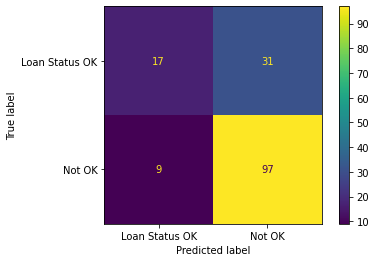

In [259]:
plot_confusion_matrix(model, X_test, y_test, values_format = "d", display_labels = ["Loan Status OK", "Not OK"])

In [ ]:
#Correctly classified for those whose has Loan_Status = 'N' - 91%, but we see a problem with those who has Loan_Status = "Y" - 41%

In [260]:
y_test

432    1
103    1
496    1
571    0
209    0
      ..
332    1
109    1
289    1
37     1
489    0
Name: Loan_Status, Length: 154, dtype: int32

In [261]:
len(y_test[y_test == 0]) #for N

48

In [262]:
len(y_test[y_test == 1]) #for Y

106

In [381]:
test = pd.read_csv("test.csv")
ID = test["Loan_ID"]
test.drop("Loan_ID", axis = 1, inplace = True)
test.fillna(0, inplace = True)
test_encoded = pd.get_dummies(test, columns = ["Dependents", "Property_Area", "Gender", "Married", "Education", "Self_Employed"])

In [384]:
test_encoded.columns = test_encoded.columns.str.replace(" ", "_")

In [385]:
test_encoded.columns.values[5] = "Dependets_00"

In [386]:
test_encoded.insert(16, "Married_0", 0)

In [387]:
test_encoded.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Dependets_00', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Gender_0',
       'Gender_Female', 'Gender_Male', 'Married_0', 'Married_No',
       'Married_Yes', 'Education_Graduate', 'Education_Not_Graduate',
       'Self_Employed_0', 'Self_Employed_No', 'Self_Employed_Yes'],
      dtype='object')

In [388]:
test_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependets_00,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,...,Gender_Female,Gender_Male,Married_0,Married_No,Married_Yes,Education_Graduate,Education_Not_Graduate,Self_Employed_0,Self_Employed_No,Self_Employed_Yes
0,5720,0,110.0,360.0,1.0,0,1,0,0,0,...,0,1,0,0,1,1,0,0,1,0
1,3076,1500,126.0,360.0,1.0,0,0,1,0,0,...,0,1,0,0,1,1,0,0,1,0
2,5000,1800,208.0,360.0,1.0,0,0,0,1,0,...,0,1,0,0,1,1,0,0,1,0
3,2340,2546,100.0,360.0,0.0,0,0,0,1,0,...,0,1,0,0,1,1,0,0,1,0
4,3276,0,78.0,360.0,1.0,0,1,0,0,0,...,0,1,0,1,0,0,1,0,1,0


In [389]:
test_predictions = model.predict(test_encoded)

In [390]:
test_predictions

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [393]:
test_predictions = pd.DataFrame(test_predictions, columns = ["Loan_Status"])

In [395]:
test_predictions["Loan_ID"] = ID

In [399]:
test_predictions["Loan_Status"].replace(0, "N", inplace = True)
test_predictions["Loan_Status"].replace(1, "Y", inplace = True)

In [412]:
test_predictions

,Loan_Status,ID
0,Y,LP001015
1,Y,LP001022
2,Y,LP001031
3,N,LP001035
4,Y,LP001051
...,...,...
362,Y,LP002971
363,Y,LP002975
364,N,LP002980
365,Y,LP002986


In [414]:
final_predictions = test_predictions[["Loan_ID", "Loan_Status"]]

In [415]:
final_predictions

,ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,N
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,N
365,LP002986,Y


In [417]:
final_predictions.to_csv( "final_submission.csv",index = False)

In [ ]:
#After submission to the https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/#MySubmissions

In [ ]:
#I got 79% accuracy. That's great for the beginning